# OpenCV Contours

Contours is a very powerful and common step for image processing applications, most images contains something in them which means often there is boundary between say one object and another. The idea of contours is to create point-to-point outline around all objects found within an image, the key attribute is that contours are always closed shapes, so there's not break or disconnect in the middle of a single contour, it defines a complete closed shape on its own.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20.0, 10.0)
plt.rcParams["image.cmap"] = "gray"

### Load an image and display

You certainly can run contours over more complex more natural scene images, but here we are going to use this simple example, so there's very clear obvious booundaries to work with, that way we can see very obviously if it's working or not.

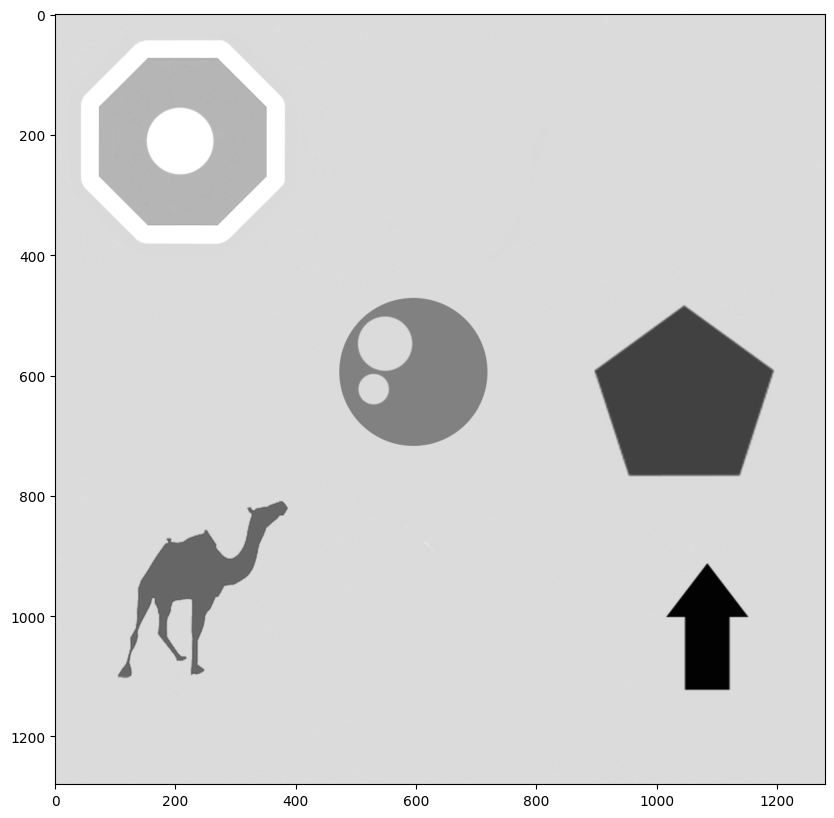

In [2]:
image_path = "../shapes.jpg"
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# dISPLAY IMAGE
plt.imshow(image_gray);

## Threshold

Thresholding is required to convert the image to black and white, highlighting the objects-of-interest to make things easy for the contour detection algorithm.

Tresholding tums the border of the object in the image completely white, with all pixels having the same intensity. The algorithm can now detect the borders of the objects from these white pixels.

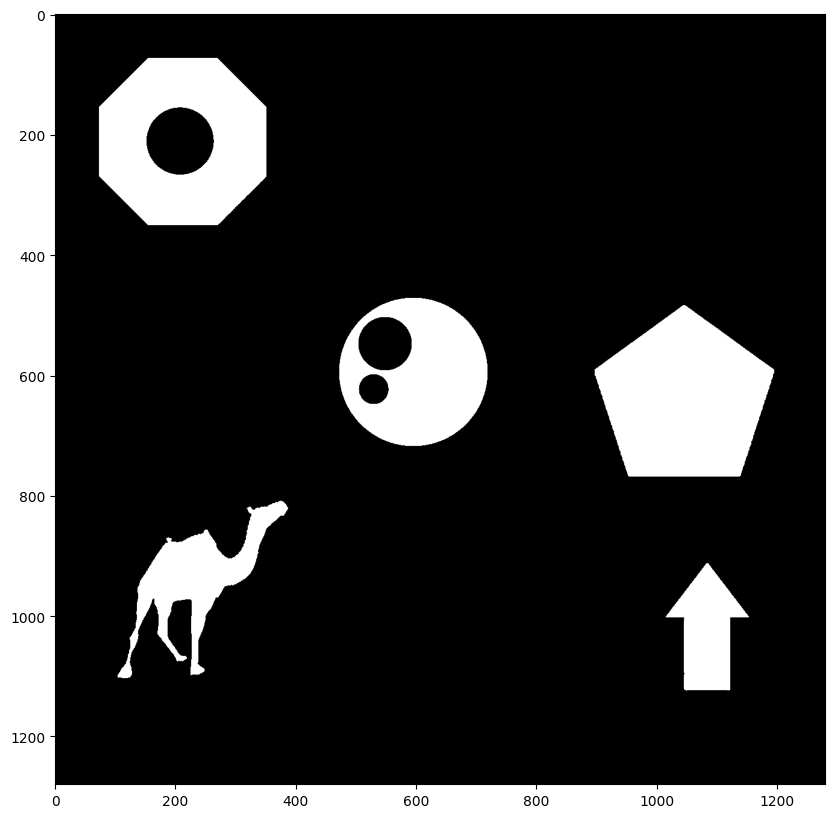

In [3]:
ret, thresh = cv2.threshold(image_gray, 200, 250, cv2.THRESH_BINARY_INV)
plt.imshow(thresh);

### Finding Contours

There are many algorithms for finding Contours, Here, we will use the OpenCV function **findContours** to get the boundaries of the objects.

The function has 3 requiered arguments:

1. image: binary image, input image (8-bit single-channel) (0 background - 1 foreground)
2. mode: Contour retrieval mode (which contours include or exclude) (include only exterior contours for example)
3. method: Contour approximation method
4. offset: Optional offset by which every contour point is shifted.

The contours is an actual list where each individual contour is a simple vector of points where the first one will connect to the very last one.

The second output is the hierarchy, this is useful for identifying overlapping elements or if one contour is fully contained inside of another one.

In [4]:
# Find all contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [5]:
# Number of contours.
print(f"Number of contours found = {len(contours)}")

# Hierarchy.
print(f"\nHierarchy: \n{hierarchy}")

Number of contours found = 8

Hierarchy: 
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [ 7  5 -1 -1]
  [-1  6 -1 -1]]]


###
 Drawing Contours

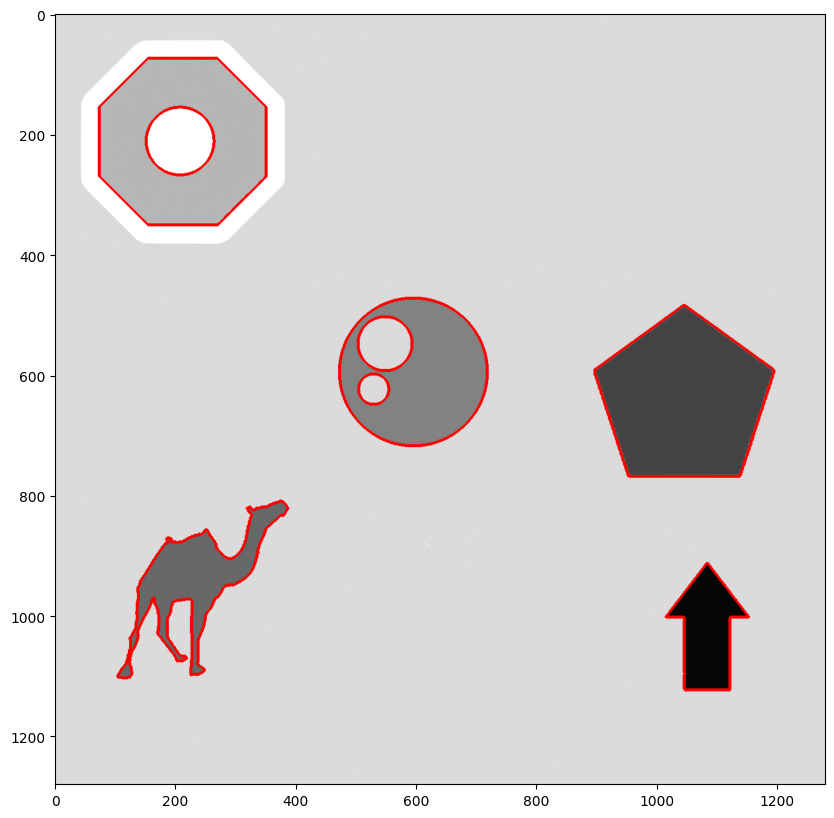

In [6]:
# Create a copy of the original image.
image_copy1 = image.copy()

# Draw all the contours.
cv2.drawContours(image_copy1, contours, -1, (0, 0, 255), 3)
plt.imshow(image_copy1[:, :, ::-1]);

### Draw the Most Outer Shapes

We have seen that both inner and outer contours have been detected. What if we only want to detect the outer contours? In that case, we can use **cv2.RETR_EXTERNAL** mode while calling **cv2.findContours** function. To acquire number of contours, we simply find the length of the array.

Total outer contours found: 5


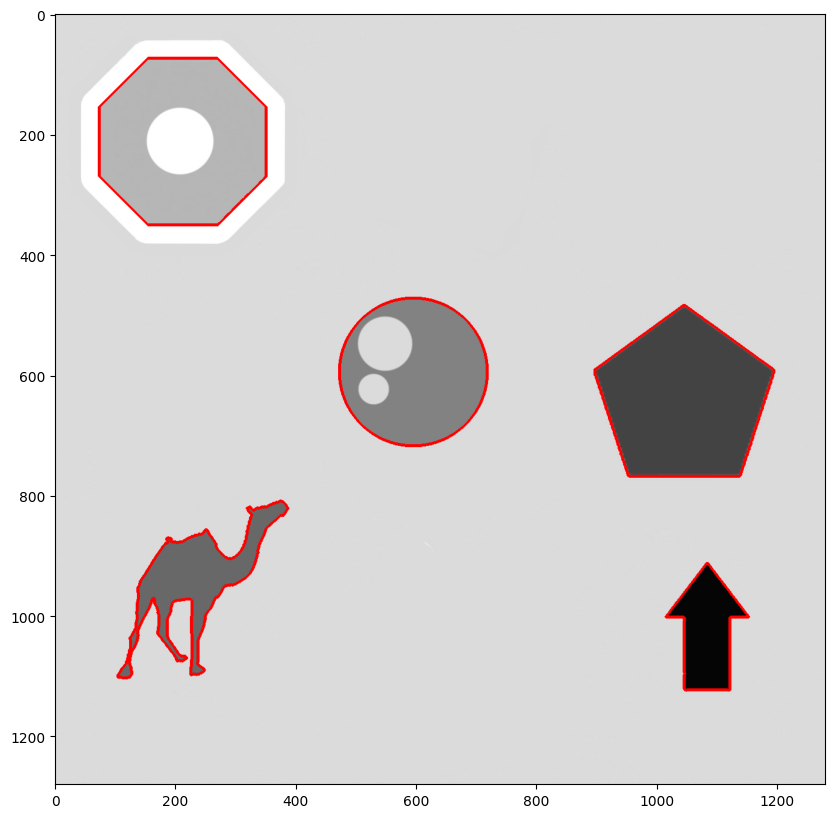

In [7]:
external_contours, extarnal_hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(f"Total outer contours found: {len(external_contours)}")

image_copy2 = image.copy()
cv2.drawContours(image_copy2, external_contours, -1, (0, 0, 255), 3)

plt.imshow(image_copy2[:, :, ::-1]);

### Draw nth contour

Let's see how to draw only the 4th contour. Note that right now we do not know the numbering of contour in terms of which index represents which shape in the figure.

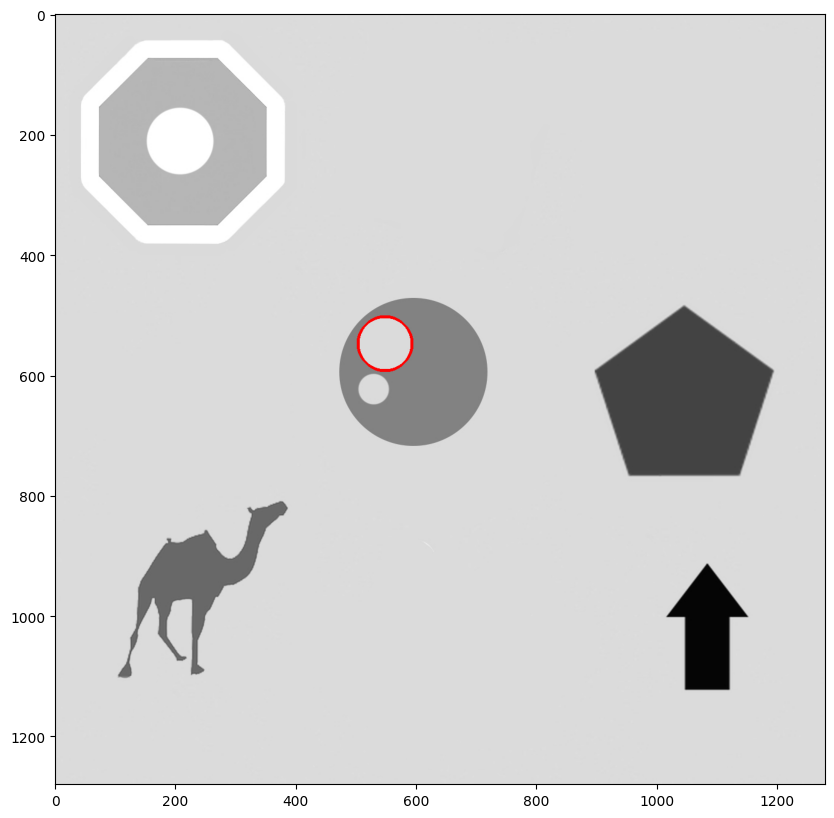

In [8]:
# Create a copy of the original image.
image_copy3 = image.copy()

# Draw contours.
draw_ind = 3
cv2.drawContours(image_copy3, contours, draw_ind, (0, 0, 255), 4)

# Display.
plt.imshow(image_copy3[:, :, ::-1]);

### Draw each contour in separate colors

Sometimes if you have complex images with lots of different shapes and therefore lots of different contours it's helpful to more easily see which contour is one object vs another.

One way to do this is by drawing each contour in its own color.

In [9]:
def convert_color(hsv):
    """Utility to convert a single hsv color tuple into bgr."""
    pixel_img = np.uint8([[hsv]])
    return tuple(int(i) for i in cv2.cvtColor(pixel_img, cv2.COLOR_HSV2BGR).flatten())

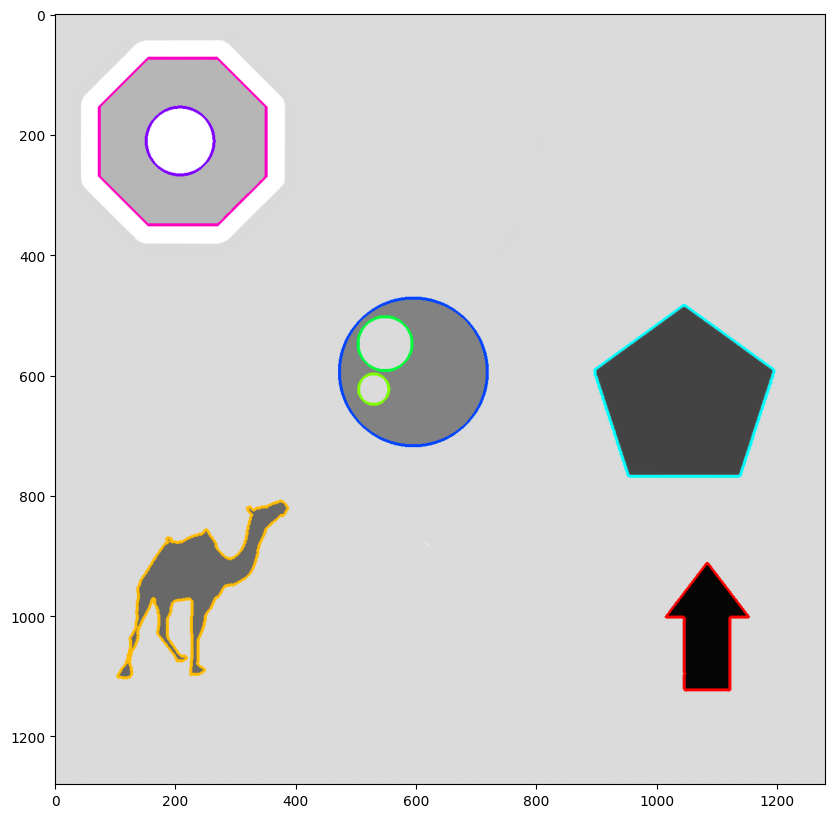

In [10]:
image_copy4 = image.copy()

for i, single_contour in enumerate(contours):
    hsv = (int(i / len(contours) * 180), 255, 255)
    color = convert_color(hsv)
    cv2.drawContours(image_copy4, contours, i, color, 3)
    plt.imshow(image_copy4[:, :, ::-1]);

### Contour Properties

Once we detect the contours from an image, it becomes very easy to do further analysis on the basis of various properties of contours.

---

### Center of Mass or Centroid

Let us find the center of mass for eacg contour. We can easily do this using OpenCV's **moments** function, and then looking at the first and zero-order spatial moments it provides. There are multiple higher level of moments you can also extract, but the first order corresponds to the statistical mean.

In [11]:
# Find all contours in the image.
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Create a copy of the original iamge.
image_copy5 = image.copy()

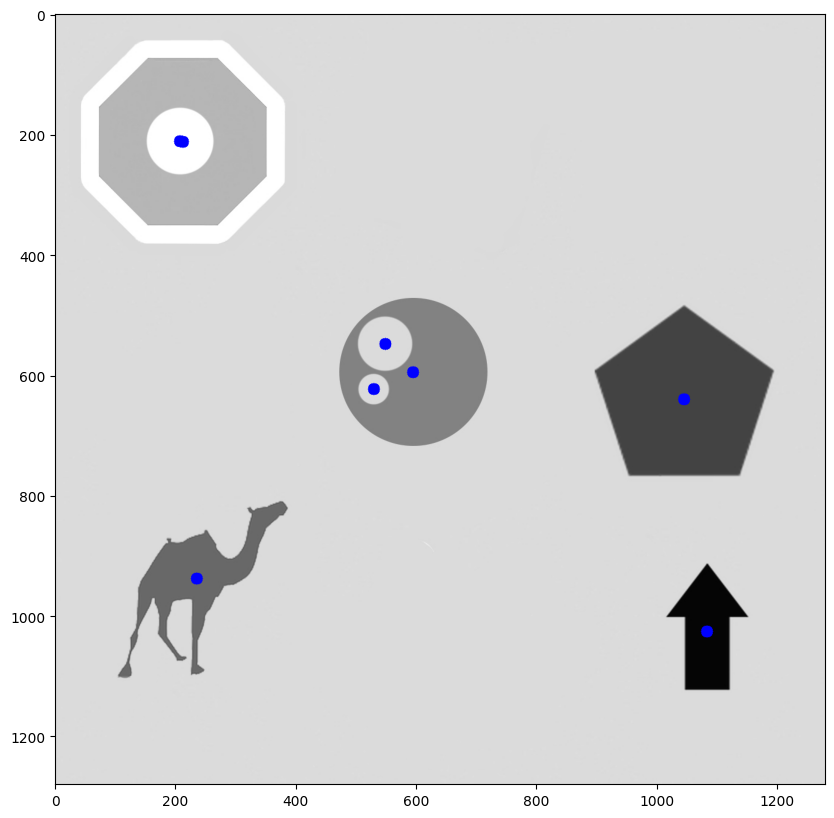

In [13]:
for cnt in contours:
    # We will use the contour moments to find the centroid.
    M = cv2.moments(cnt)
    x = int(round(M["m10"] / M["m00"]))
    y = int(round(M["m01"] / M["m00"]))
    
    # Mark the center.
    cv2.circle(image_copy5, (x, y), 10, (255, 0, 0), -1)
    
# Display.
plt.imshow(image_copy5[:, :, ::-1]);

### Area and Perimeter

In [14]:
for index, cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print(f"Contour #{index + 1} has area = {area} and perimeter = {perimeter}")

Contour #1 has area = 15451.0 and perimeter = 619.6467478275299
Contour #2 has area = 22834.0 and perimeter = 1597.5920510292053
Contour #3 has area = 1989.0 and perimeter = 166.8528118133545
Contour #4 has area = 6305.0 and perimeter = 295.07820892333984
Contour #5 has area = 59085.0 and perimeter = 971.0336074829102
Contour #6 has area = 47425.0 and perimeter = 813.6366424560547
Contour #7 has area = 9952.0 and perimeter = 373.50461435317993
Contour #8 has area = 63666.5 and perimeter = 926.9919943809509


### Bounding Boxes

There are 2 type of bounding boxes we can create around a contour:

1. Vertical rectangle
2. A rotated rectangle - This is rhe bounding box with the minimum area

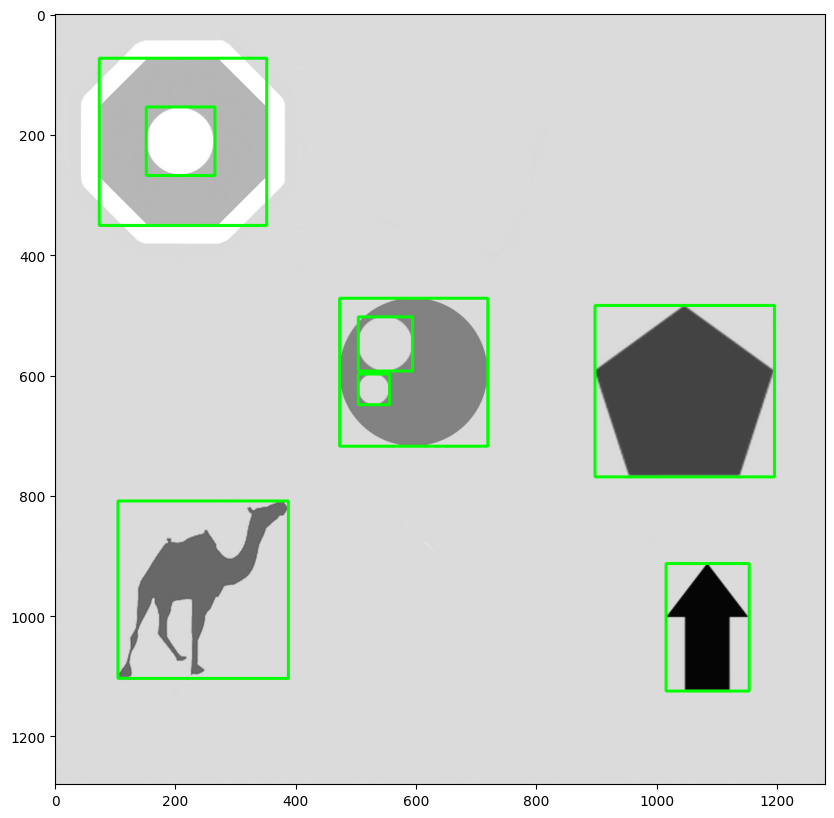

In [15]:
# Create a copy of the original image.
image_copy6 = image.copy()
for cnt in contours:
    # Certical rectangle.
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(image_copy6, (x, y), (x + w, y + h), (0, 255, 0), 4)
    
# Display.
plt.imshow(image_copy6[:, :, ::-1]);

C:\Users\Usuario iTC\AppData\Local\Temp\ipykernel_7208\1812416345.py:6: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  boxPts = np.int0(cv2.boxPoints(box))


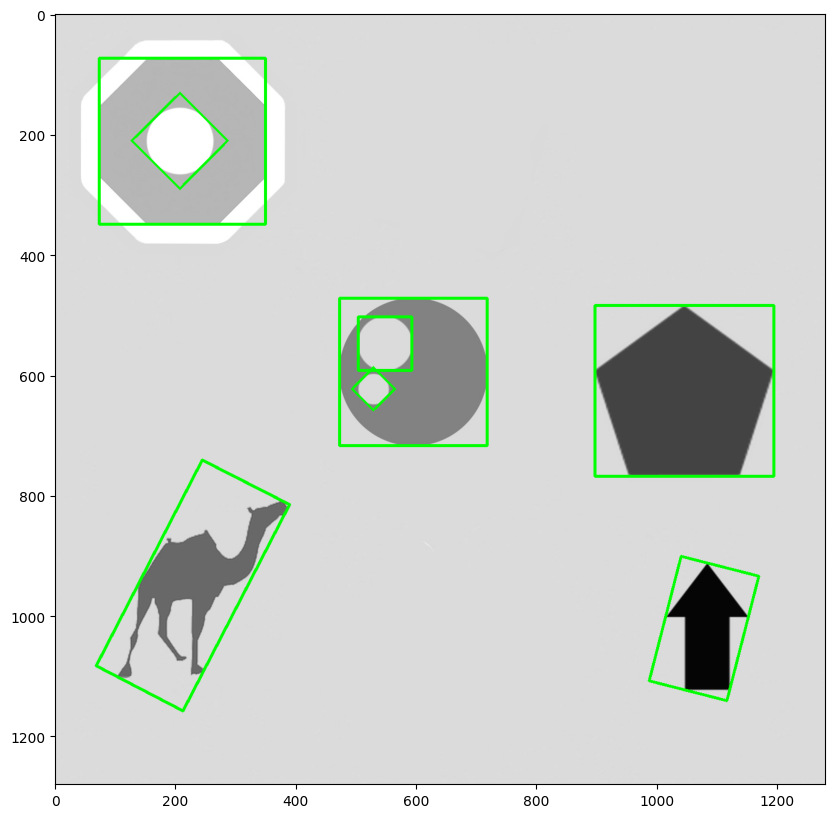

In [17]:
# Create a copy of the original image.
image_copy7 = image.copy()
for cnt in contours:
    # Rotated bounding box
    box = cv2.minAreaRect(cnt)
    boxPts = np.int0(cv2.boxPoints(box))
    # Draw contours.
    cv2.drawContours(image_copy7, [boxPts], -1, (0, 255, 0), 4)
plt.imshow(image_copy7[:, :, ::-1]);

### Fit a circle and ellipse

Circle fitting can be compared with vertical bounding box fitting. It works best with images with square aspect ratio.

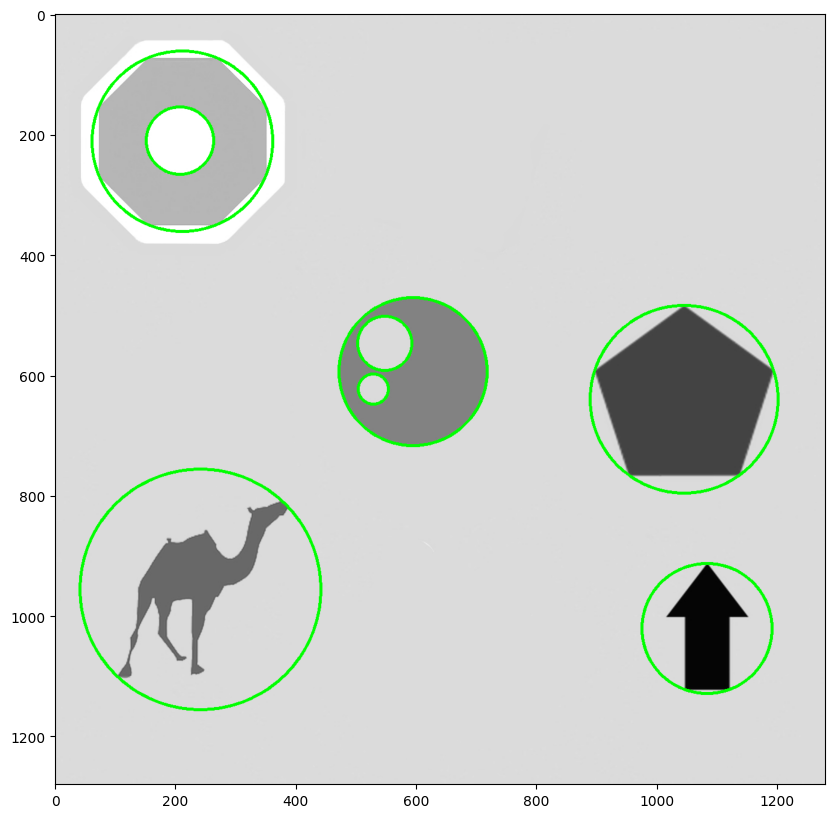

In [18]:
# Create a copy of the original image.
image_copy8 = image.copy()
for cnt in contours:
    # Circle fitting.
    ((x, y), radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(image_copy8, (int(x), int(y)), int(radius), (0, 255, 0), 4)
plt.imshow(image_copy8[:, :, ::-1]);

On the other hand, ellipse fitting can be compared with rotated bounding box that covers leaves minimum extra area. Note that we can fit an ellipse only when the contour has at least 5 points.

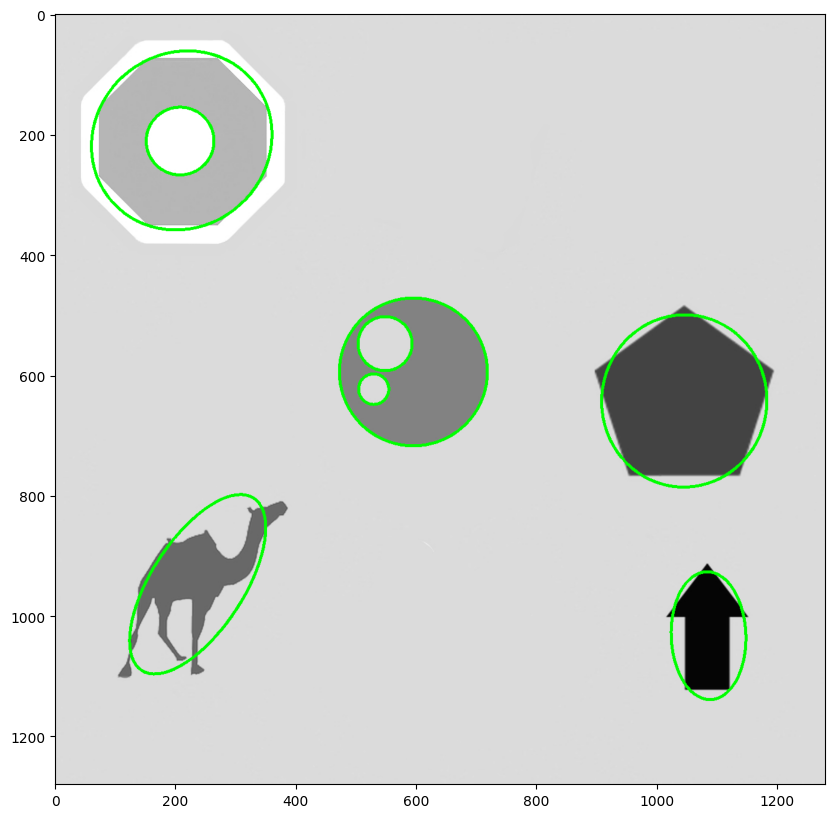

In [19]:
# Create a copy of the original image.
image_copy9 = image.copy()

for cnt in contours:
    if len(cnt) < 5:
        continue
    # Ellipse fitting.
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(image_copy9, ellipse, (0, 255, 0), 4)
plt.imshow(image_copy9[:, :, ::-1]);